# Download data from datafed 

In [1]:
# # transfer ds to nhi-gpu

# import json # For dealing with metadata
# import os # For file level operations
# from datafed.CommandLib import API
# df_api = API()

# ls_resp = df_api.collectionItemsList('c/391027993', count=50)
# print(ls_resp)

In [2]:
# dv_resp = df_api.dataView('d/395020592')
# metadata = json.loads(dv_resp[0].data[0].metadata)
# print(metadata)

# id_index = dv_resp[0].data[0].id
# get_resp = df_api.dataGet(id_index, '/scratch/yichen/pld_plumes/', orig_fname=True, wait=True)
# get_resp

# Load function

In [2]:
import numpy as np
import sys
sys.path.append('../')
from utils import show_h5_dataset_name
from utils import load_h5_examples
from utils import show_images
from PlumeEvaluation import PlumeMetrics
from PlumeEvaluation import plot_metrics
from PlumeEvaluation import plot_metrics_heatmap

def process_func(images):
    '''
    An example process function to preprocess images before conducting following steps

    :param images: images to preprocess
    :type images: np.array
    '''

    images = images[np.random.randint(0, images.shape[0])]
    return images

# YG015

In [3]:
ds_path = '/Image/Wavelength_scan_BTO_Yichen_Guo, Julian Goddy_02292024.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-BaTiO3']>


In [5]:
plumes.shape

(231, 128, 250, 400)

In [8]:
selected = plumes[:,3]

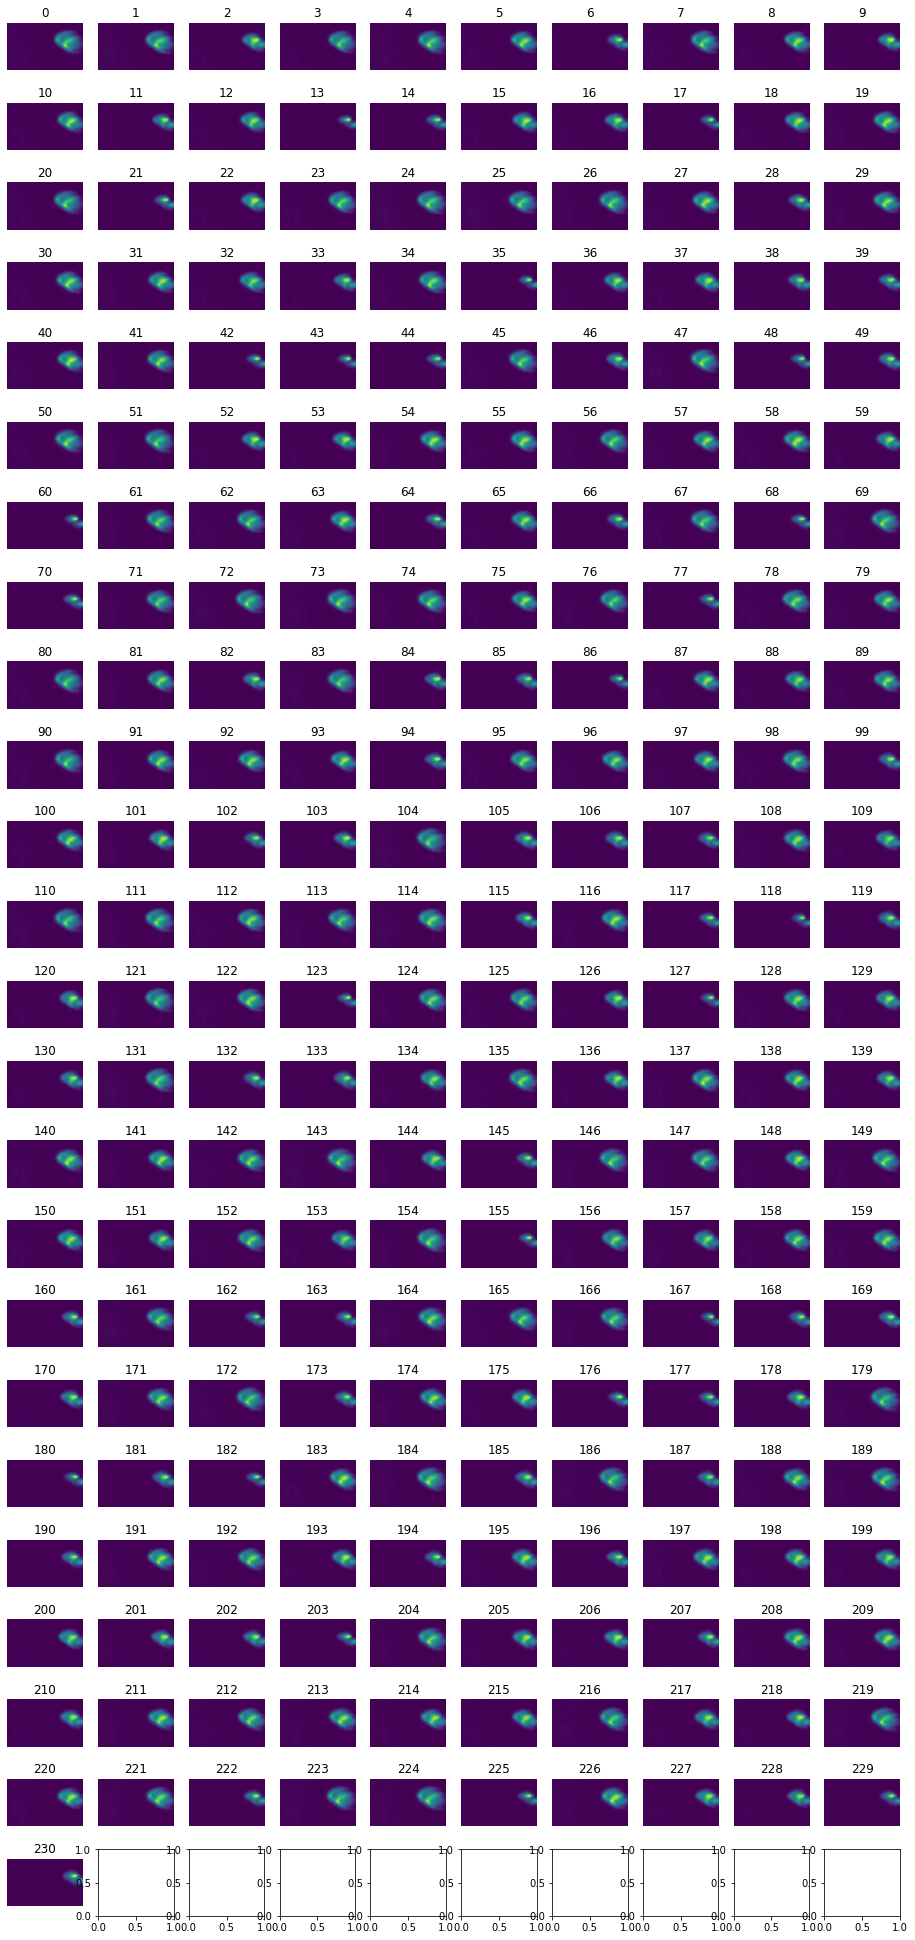

In [12]:
show_images(selected, img_per_row=10)    

In [13]:
intensity = np.sum(selected, axis=(1,2))

In [15]:
intensity.shape

(231,)

In [17]:
import matplotlib.pyplot as plt

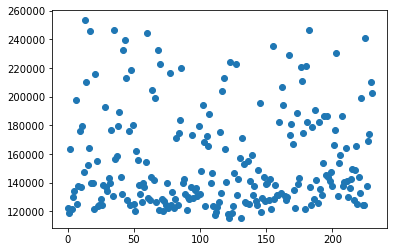

In [24]:
plt.scatter(list(range(intensity.shape[0])), intensity)

(231,)


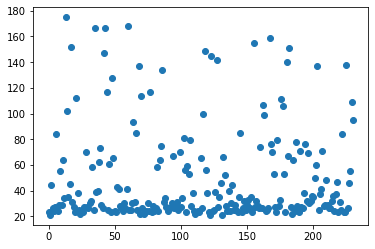

In [25]:
intensity = np.max(selected, axis=(1,2))
print(intensity.shape)
plt.scatter(list(range(intensity.shape[0])), intensity)

In [11]:
p.shape

(250, 400)

In [9]:
for p in selected:
    show_images(p, img_per_row=10)    

IndexError: tuple index out of range

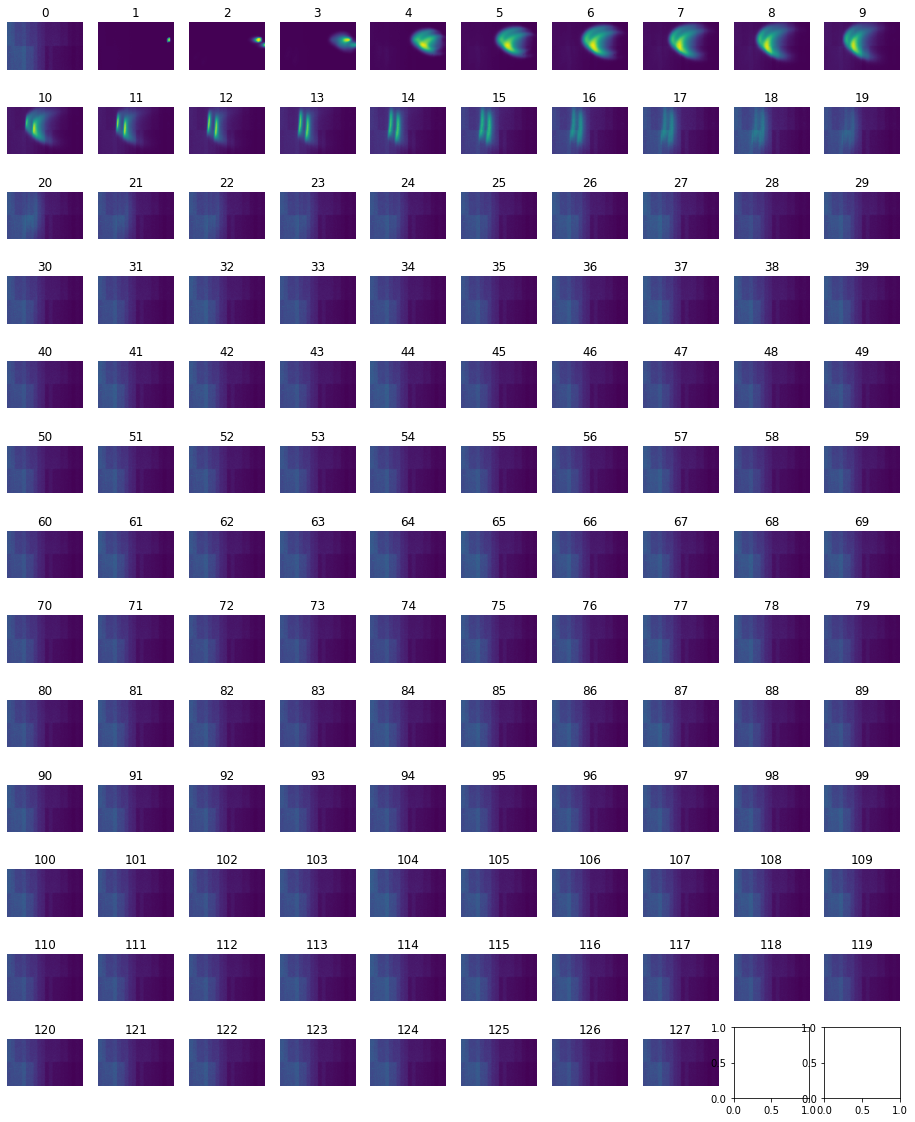

In [4]:
ds_name = '1-BaTiO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [5]:
condition = '100mj-700c-200mtorr-10hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg015 = m.to_df(plot_all)
df_yg015.sample(n=5)

condition        metric  growth_index  time_step  \
3606   100mj-700c-200mtorr-10hz          area            28         22   
77606  100mj-700c-200mtorr-10hz  eccentricity            53         38   
42476  100mj-700c-200mtorr-10hz    centroid-1            15        108   
58847  100mj-700c-200mtorr-10hz    centroid-2            64         95   
93862  100mj-700c-200mtorr-10hz      velocity            22         38   

               a.u.  
3606   18229.000000  
77606      0.882479  
42476      0.000000  
58847      0.000000  
93862    218.000000

area


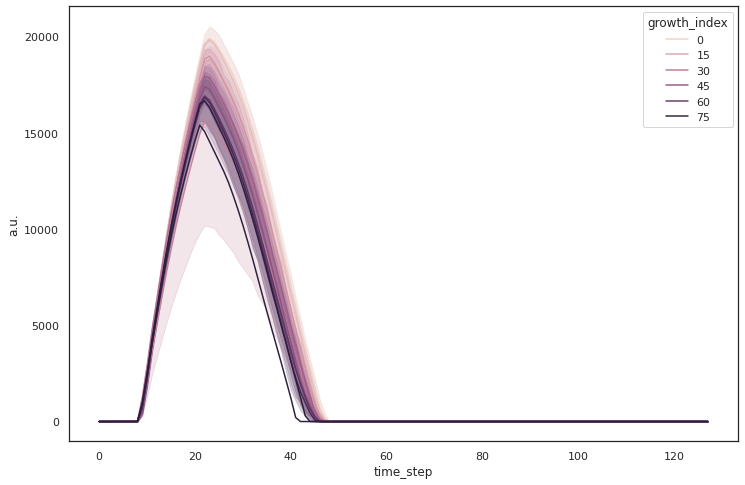

axis_major_length


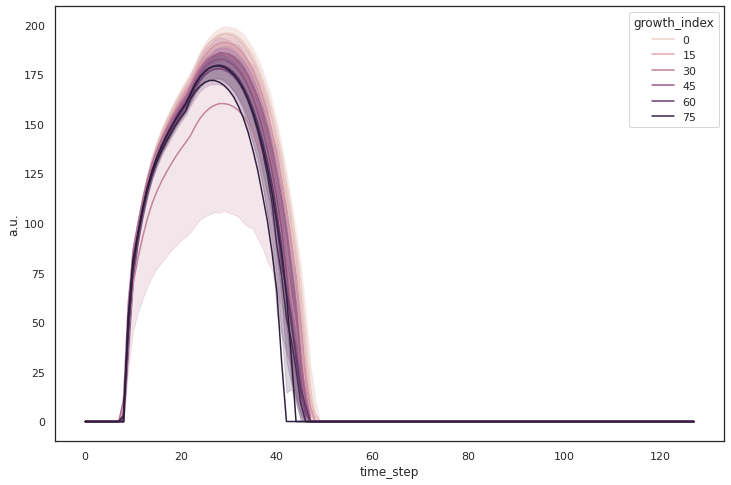

axis_minor_length


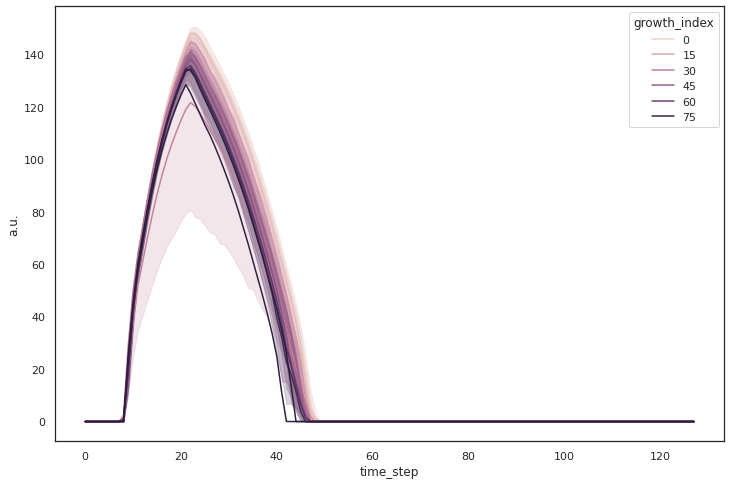

centroid-1


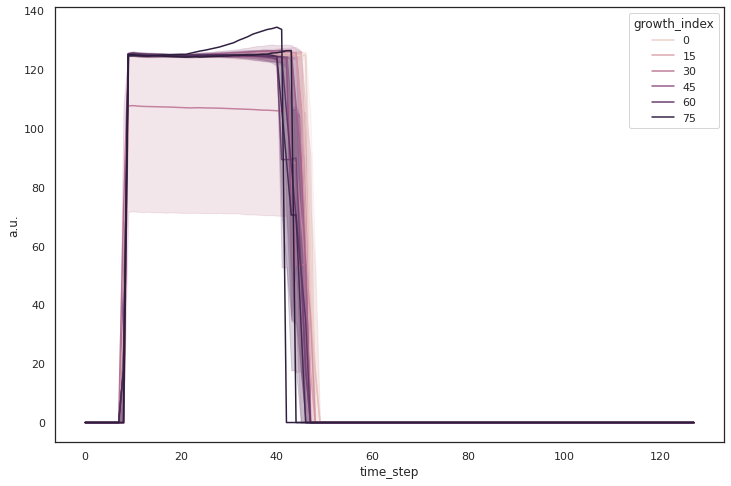

centroid-2


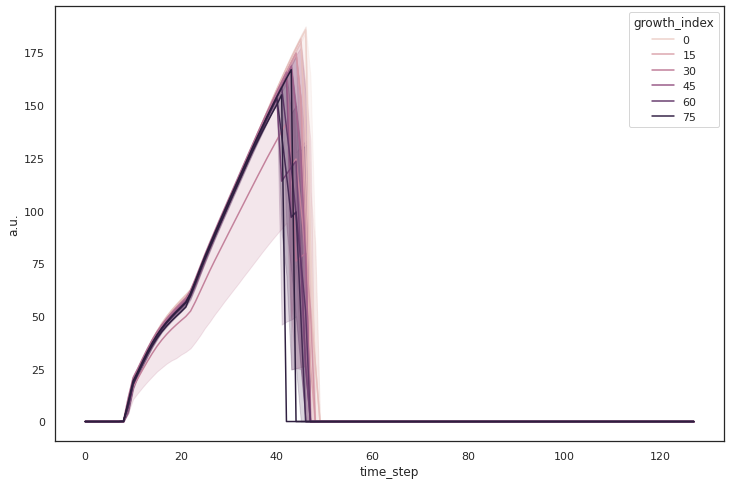

orientation


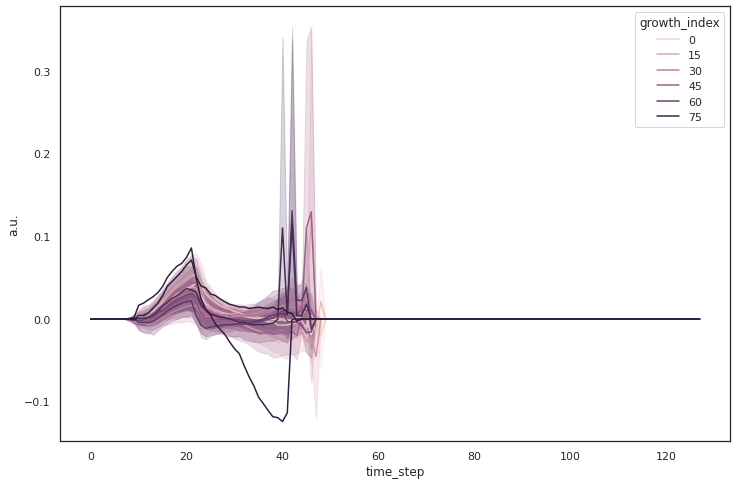

eccentricity


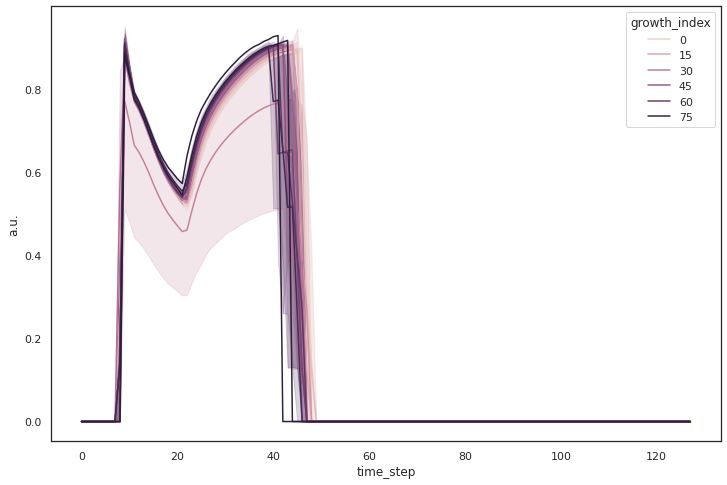

perimeter


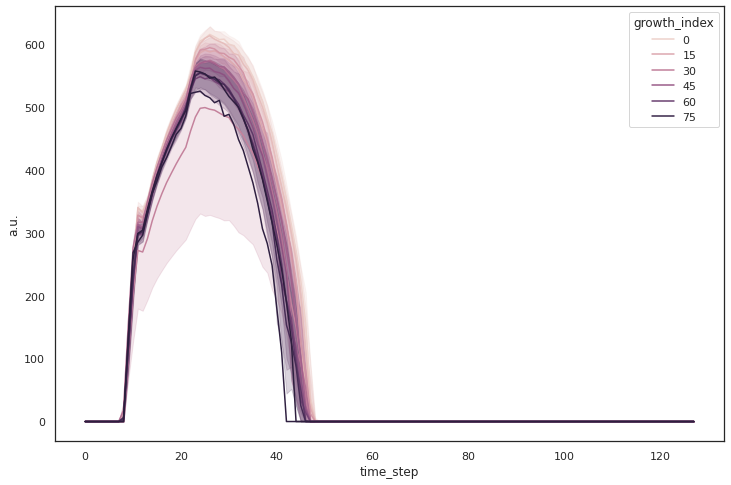

velocity


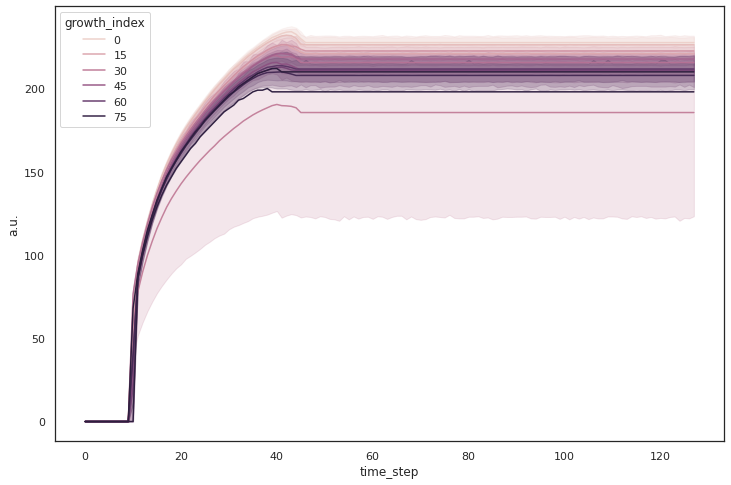

condition    metric  growth_index  time_step   a.u.
0       100mj-700c-200mtorr-10hz      area             0          0    0.0
1       100mj-700c-200mtorr-10hz      area             0          1    0.0
2       100mj-700c-200mtorr-10hz      area             0          2    0.0
3       100mj-700c-200mtorr-10hz      area             0          3    0.0
4       100mj-700c-200mtorr-10hz      area             0          4    0.0
...                          ...       ...           ...        ...    ...
101115  100mj-700c-200mtorr-10hz  velocity            78        123  210.0
101116  100mj-700c-200mtorr-10hz  velocity            78        124  210.0
101117  100mj-700c-200mtorr-10hz  velocity            78        125  210.0
101118  100mj-700c-200mtorr-10hz  velocity            78        126  210.0
101119  100mj-700c-200mtorr-10hz  velocity            78        127  210.0

[101120 rows x 5 columns]

In [7]:
plot_metrics(df_yg015, sort_by='growth_index')

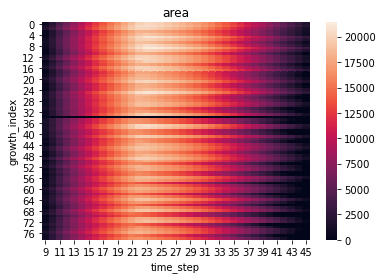

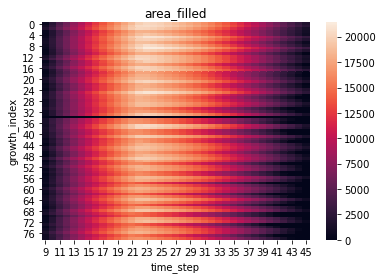

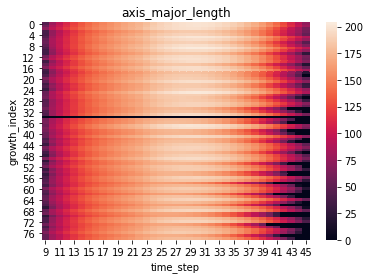

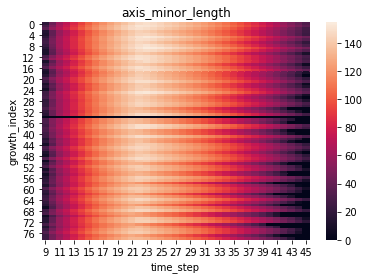

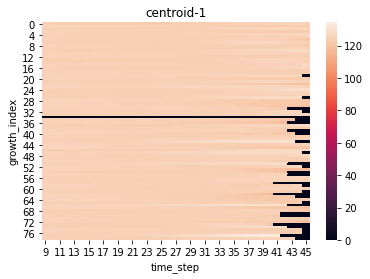

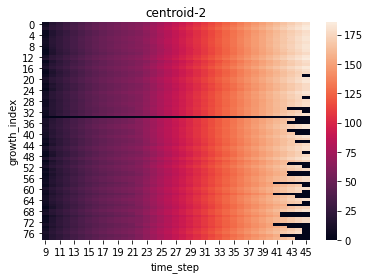

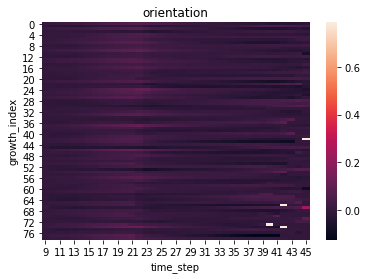

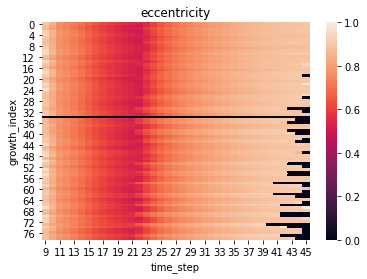

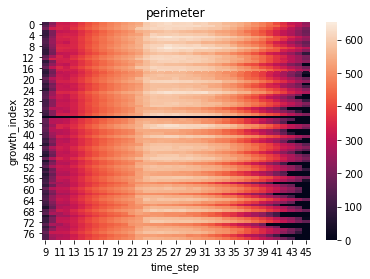

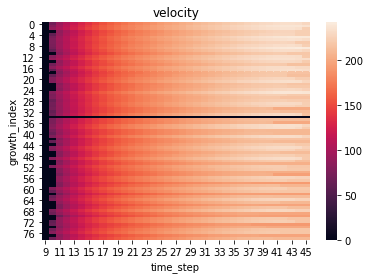

In [19]:
plot_metrics_heatmap(df_yg015, frame_range=(8, 46))

# YG016

In [6]:
ds_path = '/scratch/yichen/pld_plumes/YG016_Yichen_Guo_04272022.h5'
class_name = 'PLD_Plumes'
show_h5_dataset_name(ds_path, class_name)

<KeysViewHDF5 ['1-SrRuO3', '1-SrRuO3_Pre']>


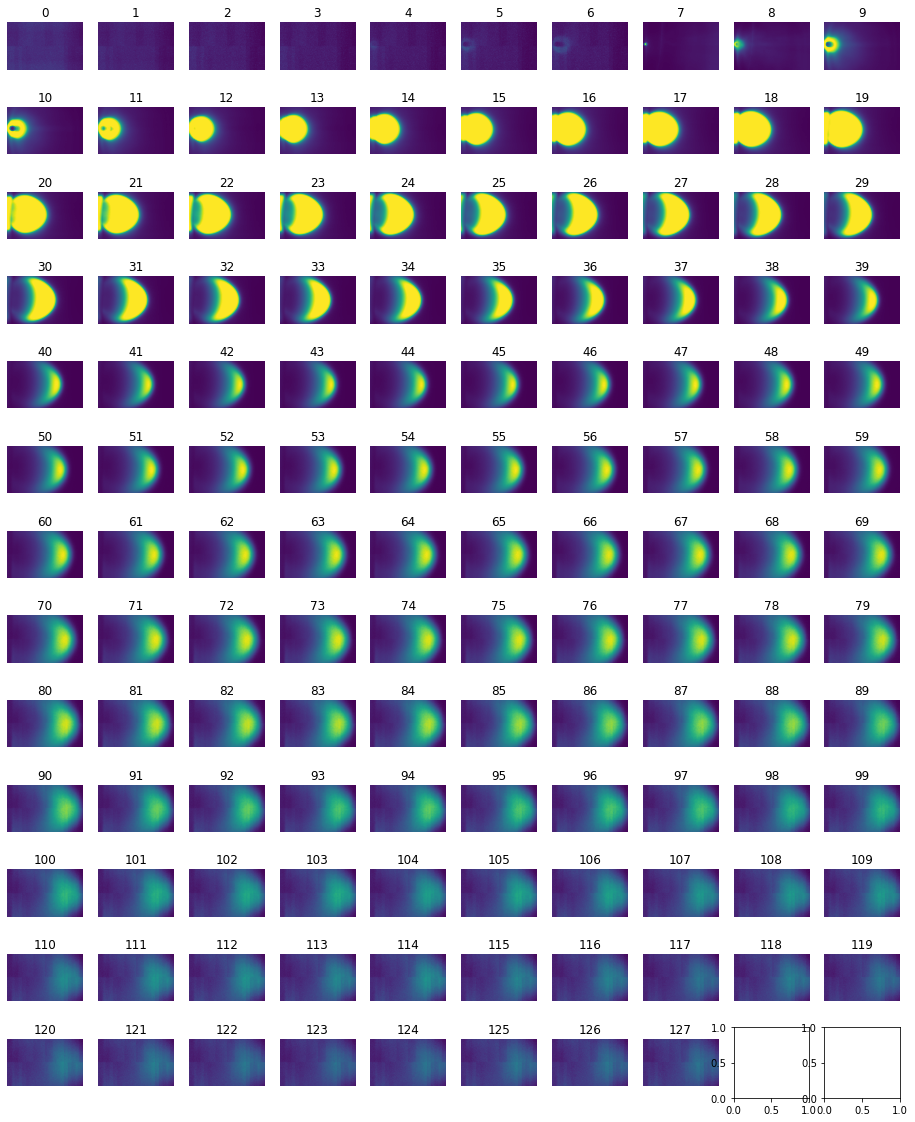

In [7]:
ds_name = '1-SrRuO3'
plumes = load_h5_examples(ds_path, class_name, ds_name, process_func, show=False)
show_images(np.mean(plumes, axis=0), img_per_row=10)

In [8]:
condition = '100mj-700c-200mtorr-12hz'
m = PlumeMetrics(plumes, condition)

plot_all = m.get_metrics()
df_yg016 = m.to_df(plot_all)
df_yg016.sample(n=5)

condition        metric  growth_index  time_step  \
46464  100mj-700c-200mtorr-12hz  eccentricity            41          0   
27813  100mj-700c-200mtorr-12hz    centroid-1            33         37   
7839   100mj-700c-200mtorr-12hz   area_filled            15         31   
4049   100mj-700c-200mtorr-12hz          area            31         81   
38609  100mj-700c-200mtorr-12hz   orientation            25         81   

               a.u.  
46464      0.000000  
27813    124.370872  
7839   20722.000000  
4049       0.000000  
38609      0.000000

area


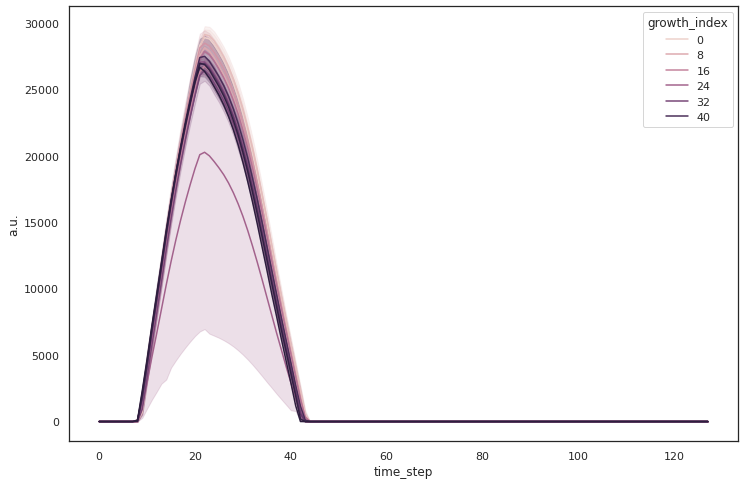

area_filled


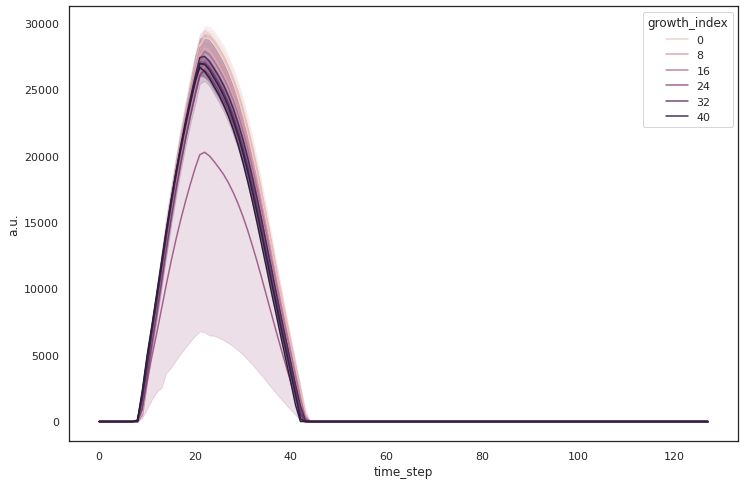

axis_major_length


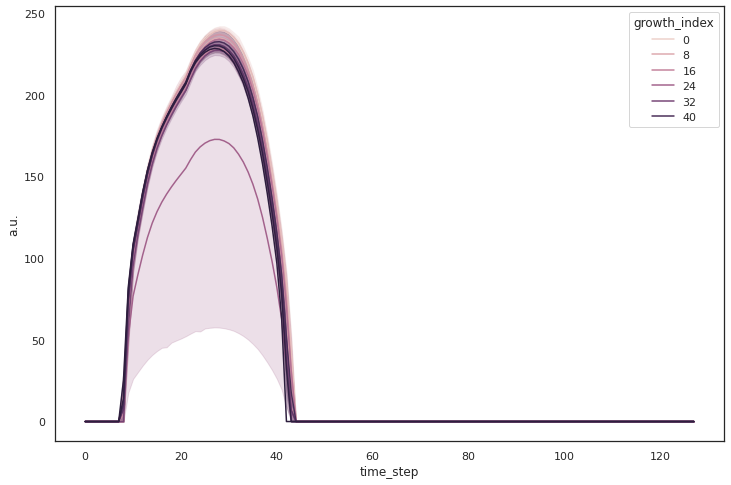

axis_minor_length


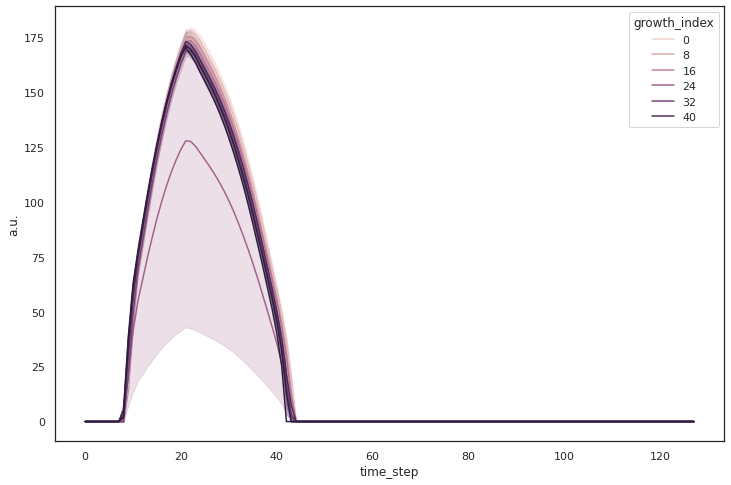

centroid-1


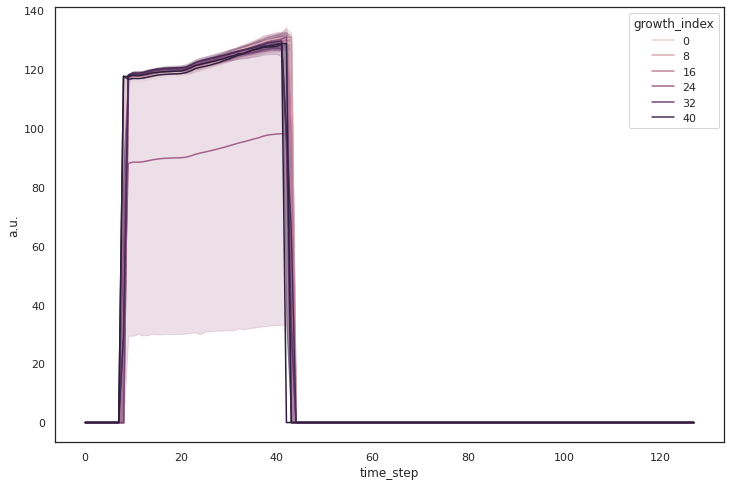

centroid-2


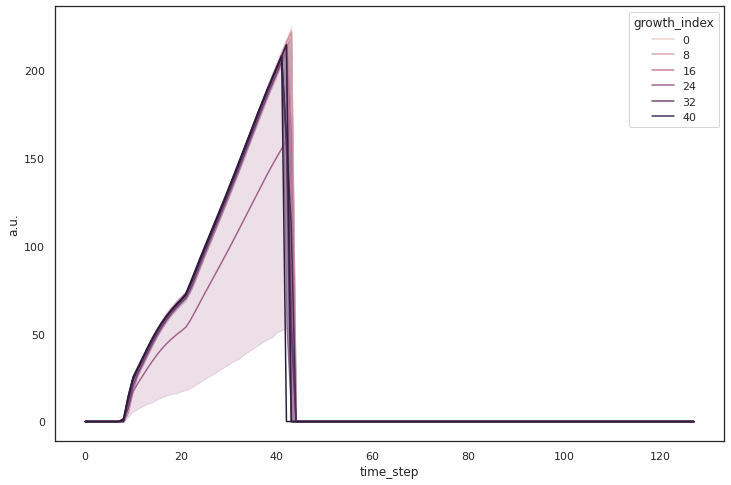

orientation


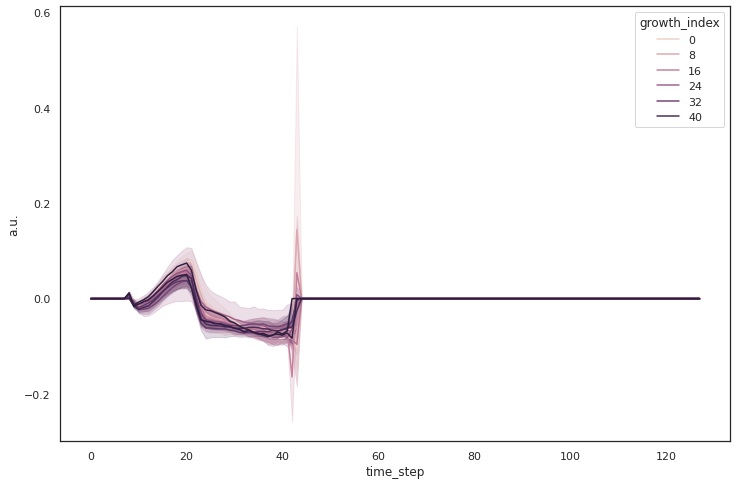

eccentricity


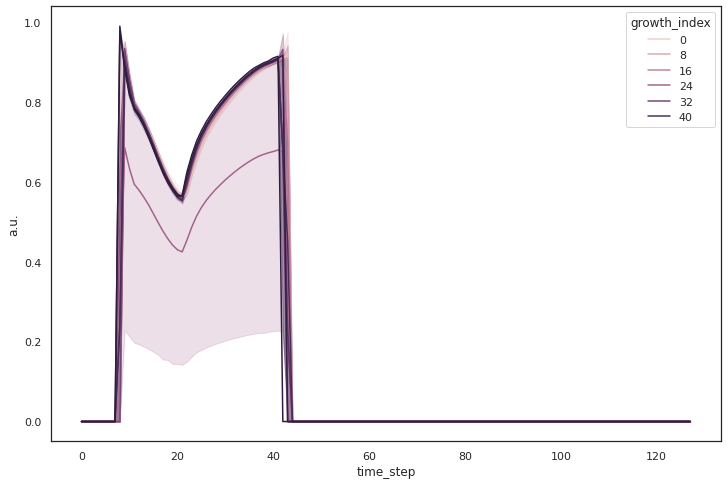

perimeter


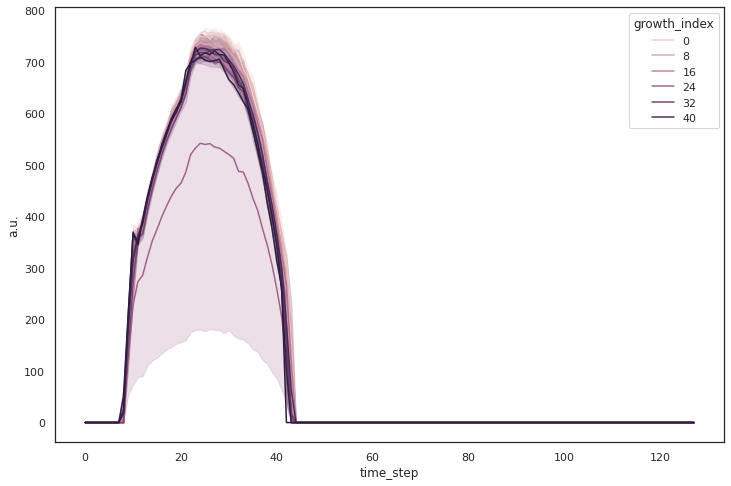

velocity


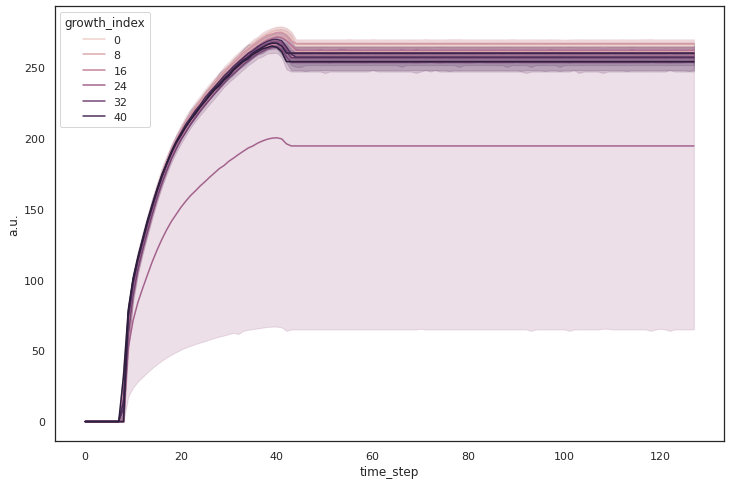

condition    metric  growth_index  time_step   a.u.
0      100mj-700c-200mtorr-12hz      area             0          0    0.0
1      100mj-700c-200mtorr-12hz      area             0          1    0.0
2      100mj-700c-200mtorr-12hz      area             0          2    0.0
3      100mj-700c-200mtorr-12hz      area             0          3    0.0
4      100mj-700c-200mtorr-12hz      area             0          4    0.0
...                         ...       ...           ...        ...    ...
58875  100mj-700c-200mtorr-12hz  velocity            45        123  254.0
58876  100mj-700c-200mtorr-12hz  velocity            45        124  254.0
58877  100mj-700c-200mtorr-12hz  velocity            45        125  254.0
58878  100mj-700c-200mtorr-12hz  velocity            45        126  254.0
58879  100mj-700c-200mtorr-12hz  velocity            45        127  254.0

[58880 rows x 5 columns]

In [12]:
df_yg016_hm = plot_metrics(df_yg016, sort_by='growth_index')

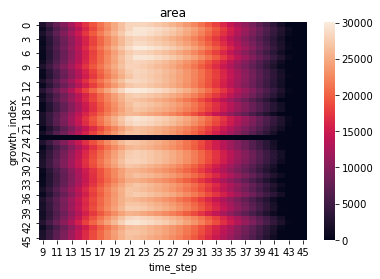

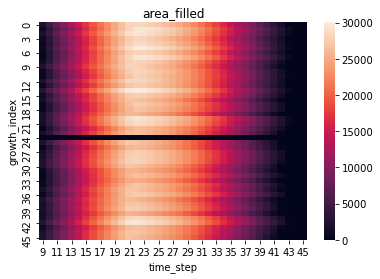

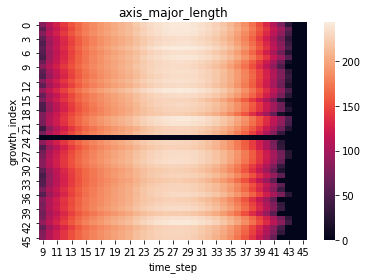

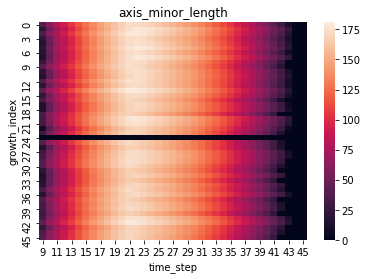

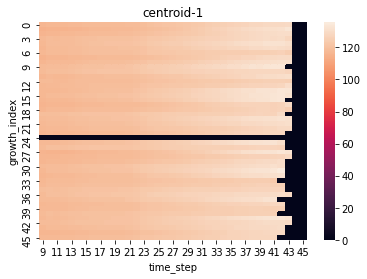

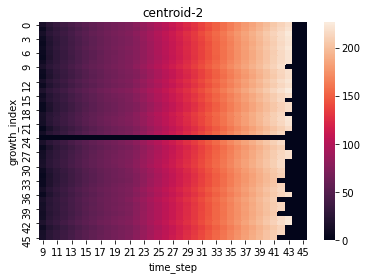

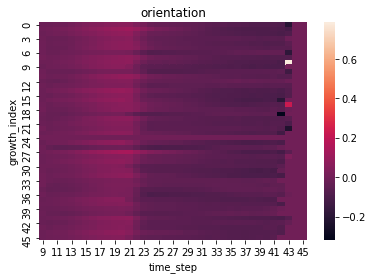

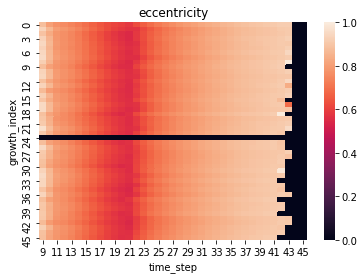

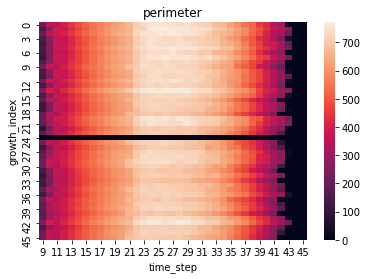

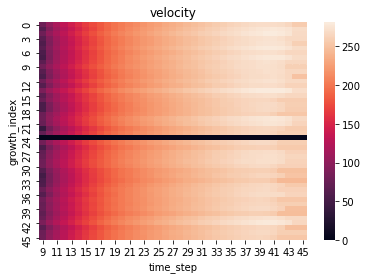

In [20]:
plot_metrics_heatmap(df_yg016, frame_range=(8, 46))

# sort with condition

In [14]:
import pandas as pd

In [15]:
df_yg015_yg016 = pd.concat([df_yg015, df_yg016], ignore_index=True)

area


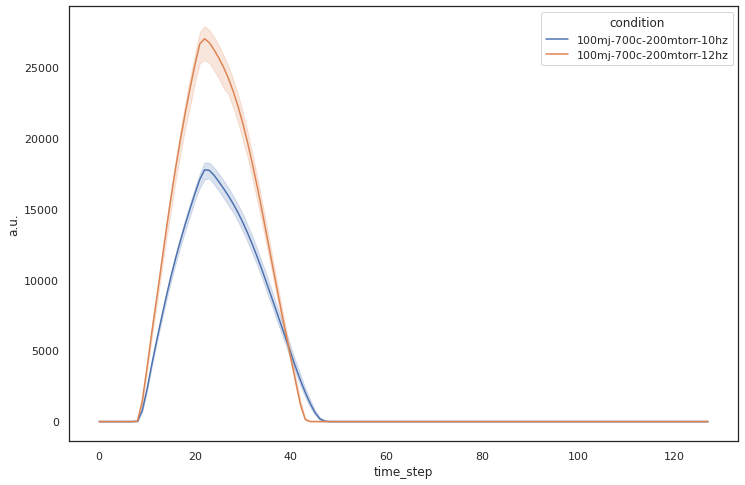

area_filled


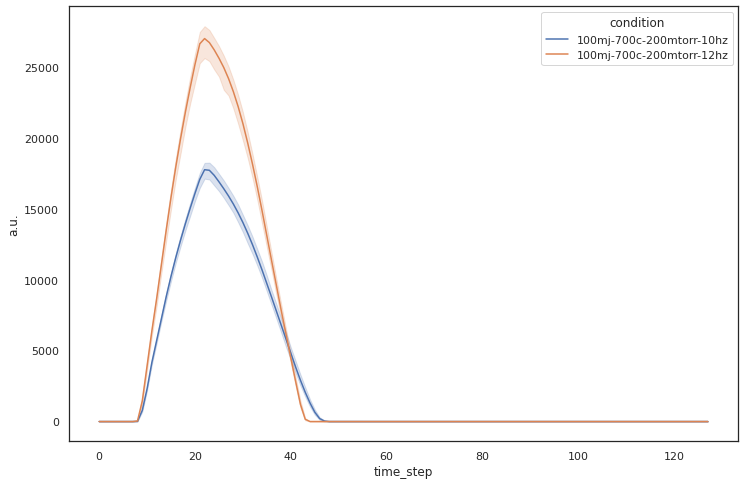

axis_major_length


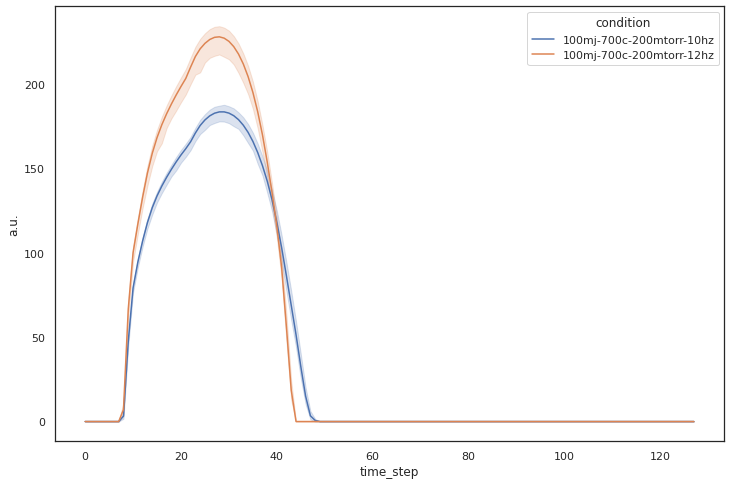

axis_minor_length


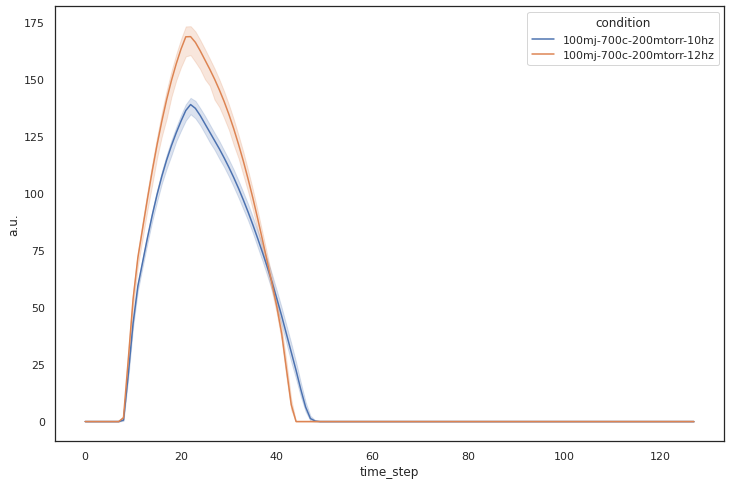

centroid-1


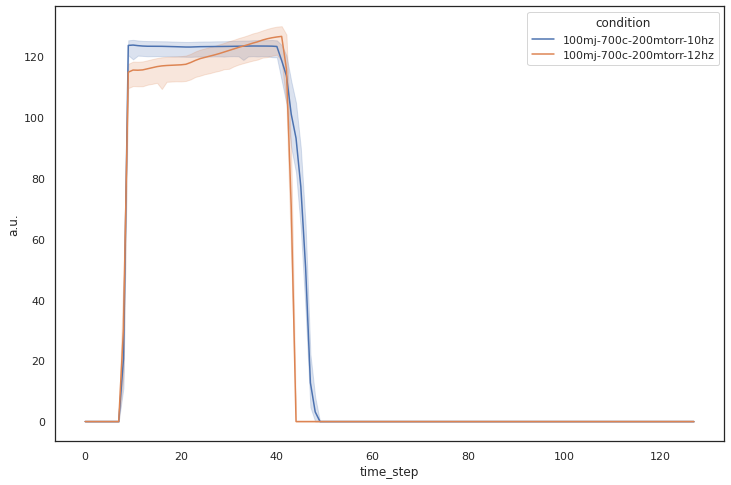

centroid-2


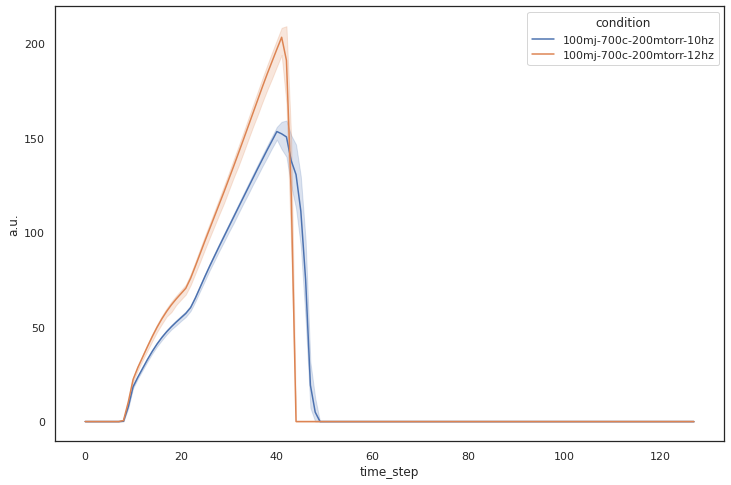

orientation


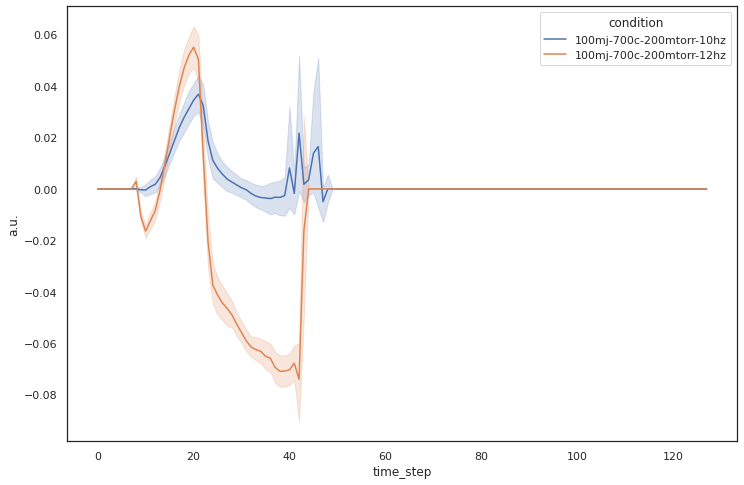

eccentricity


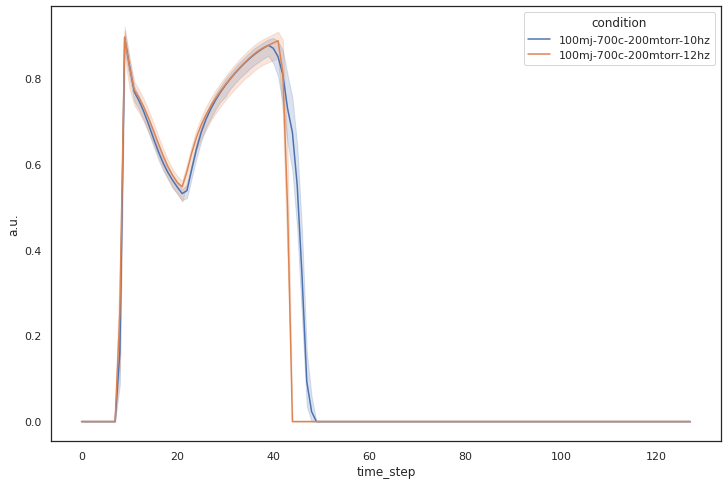

perimeter


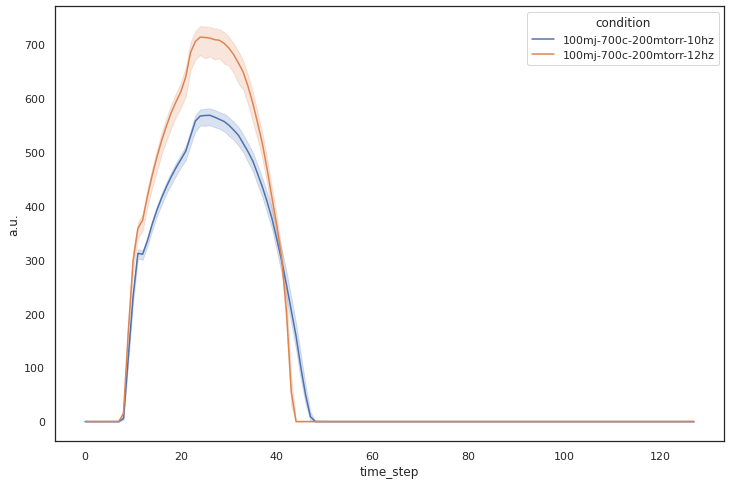

velocity


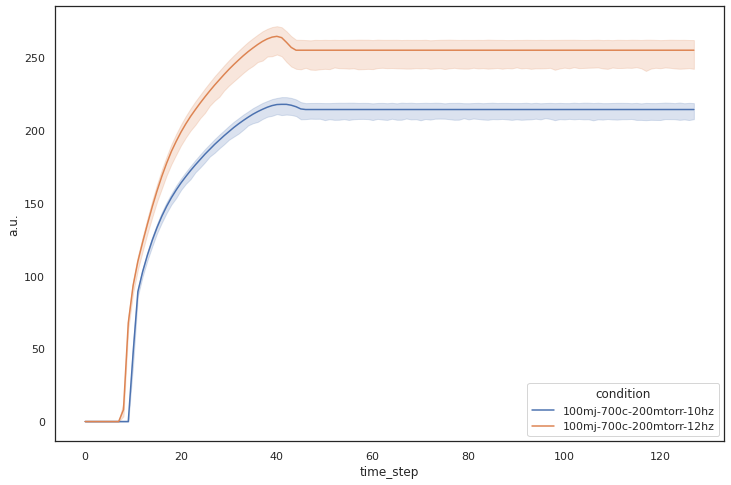

condition    metric  growth_index  time_step   a.u.
0       100mj-700c-200mtorr-10hz      area             0          0    0.0
1       100mj-700c-200mtorr-10hz      area             0          1    0.0
2       100mj-700c-200mtorr-10hz      area             0          2    0.0
3       100mj-700c-200mtorr-10hz      area             0          3    0.0
4       100mj-700c-200mtorr-10hz      area             0          4    0.0
...                          ...       ...           ...        ...    ...
159995  100mj-700c-200mtorr-12hz  velocity            45        123  254.0
159996  100mj-700c-200mtorr-12hz  velocity            45        124  254.0
159997  100mj-700c-200mtorr-12hz  velocity            45        125  254.0
159998  100mj-700c-200mtorr-12hz  velocity            45        126  254.0
159999  100mj-700c-200mtorr-12hz  velocity            45        127  254.0

[160000 rows x 5 columns]

In [16]:
plot_metrics(df_yg015_yg016, sort_by='condition')